In [ ]:
!pip install pandas_datareader

In [ ]:
import pandas_datareader as pdr
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
plt.rcParams['figure.figsize'] = [12, 4]

## 1. Dataset

In [ ]:
df = web.DataReader('TSLA', 'stooq')
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-01-28,396.91,400.59,386.50,398.09,48910676
2025-01-27,394.80,406.69,389.00,397.15,58125510
2025-01-24,414.45,418.88,405.78,406.58,56427149
2025-01-23,416.06,420.73,408.95,412.38,50690592
2025-01-22,416.81,428.00,414.59,415.11,60963342


In [ ]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-31,42.6667,43.5333,42.1667,43.3700,235788990
2020-02-03,44.9133,52.4100,44.9000,52.0000,708502425
2020-02-04,58.8633,64.6000,55.5933,59.1367,914081370
2020-02-05,54.8833,56.4000,46.9400,48.9800,726357555
2020-02-06,46.6600,53.0567,45.8000,49.9300,598211280


<Axes: title={'center': 'TSLA Stock'}, xlabel='Date'>

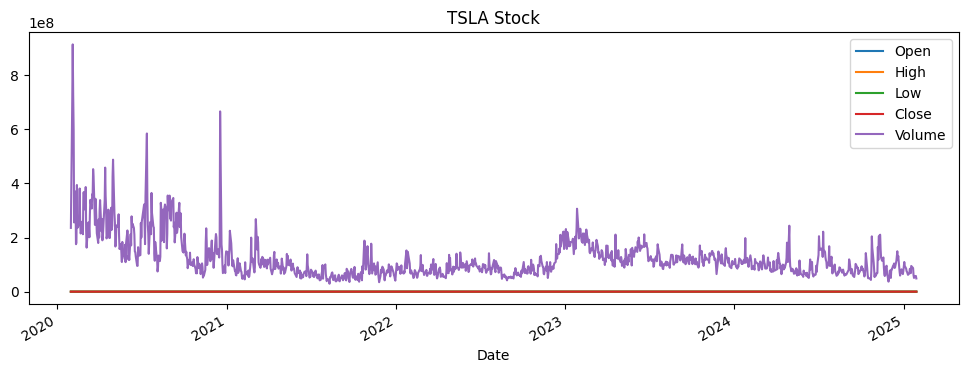

In [ ]:
df.plot(title='TSLA Stock')

## 2. Moving Avg
  * used to smooth out fluctuations and identify trends.
  * 3 main methods:

### 2a) simple moving avg (SMA)
  * unweighted average of the last N observations in a rolling window
  * disadvantages:
      * equal weightage to all prev samples
      * as N increases ⟶ reacts slower to recent trends

In [ ]:
df['Open_SMA_10'] = df['Open'].rolling(window=10, min_periods=1).mean()
df['Open_SMA_30'] = df['Open'].rolling(window=30, min_periods=1).mean()
df['Open_SMA_50'] = df['Open'].rolling(window=50, min_periods=1).mean()
df.head()

,Open,High,Low,Close,Volume,Open_SMA_10,Open_SMA_30,Open_SMA_50
Date,,,,,,,,
2020-01-31,42.6667,43.5333,42.1667,43.3700,235788990,42.666700,42.666700,42.666700
2020-02-03,44.9133,52.4100,44.9000,52.0000,708502425,43.790000,43.790000,43.790000
2020-02-04,58.8633,64.6000,55.5933,59.1367,914081370,48.814433,48.814433,48.814433
2020-02-05,54.8833,56.4000,46.9400,48.9800,726357555,50.331650,50.331650,50.331650
2020-02-06,46.6600,53.0567,45.8000,49.9300,598211280,49.597320,49.597320,49.597320


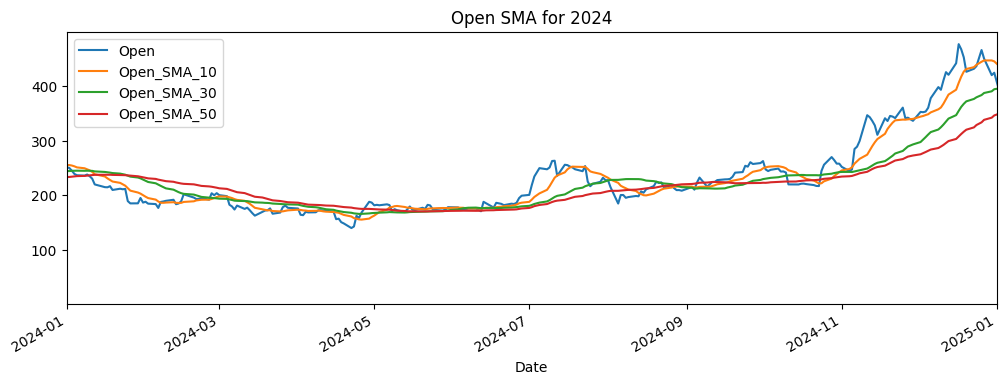

In [ ]:
df['Open'].plot()
df['Open_SMA_10'].plot()
df['Open_SMA_30'].plot()
df['Open_SMA_50'].plot()

plt.xlim(['2024-01-01', '2025-01-01'])
plt.title('Open SMA for 2024')
plt.legend()

### 2b) cumulative moving avg (CMA)
  * computes average of all data points up to the current time step
  * disadvantages:
    * highly influenced by early values
    * slowest to react to recent trends

In [ ]:
df['Open_CMA'] = df['Open'].expanding().mean()
df.head()

,Open,High,Low,Close,Volume,Open_SMA_10,Open_SMA_30,Open_SMA_50,Open_CMA
Date,,,,,,,,,
2020-01-31,42.6667,43.5333,42.1667,43.3700,235788990,42.666700,42.666700,42.666700,42.666700
2020-02-03,44.9133,52.4100,44.9000,52.0000,708502425,43.790000,43.790000,43.790000,43.790000
2020-02-04,58.8633,64.6000,55.5933,59.1367,914081370,48.814433,48.814433,48.814433,48.814433
2020-02-05,54.8833,56.4000,46.9400,48.9800,726357555,50.331650,50.331650,50.331650,50.331650
2020-02-06,46.6600,53.0567,45.8000,49.9300,598211280,49.597320,49.597320,49.597320,49.597320


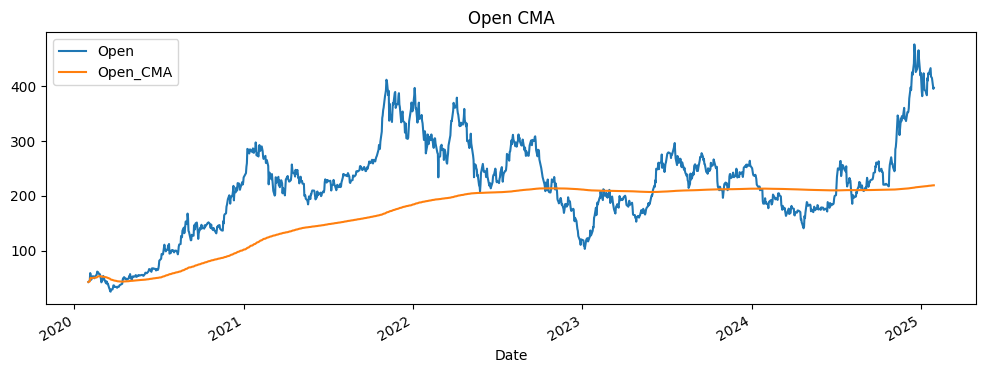

In [ ]:
df['Open'].plot()
df['Open_CMA'].plot()

plt.title('Open CMA')
plt.legend()

### 2c) exponential weighted moving avg (EWMA)
  $EWMA_t = (\alpha * X_t) + (1-\alpha) * EWMA_{t-1}$
  * assigns higher weight to recent values, making it more responsive to recent trends.

In [ ]:
df['Open_EWMA_10'] = df['Open'].ewm(span=10).mean()
df.head()

,Open,High,Low,Close,Volume,Open_SMA_10,Open_SMA_30,Open_SMA_50,Open_CMA,Open_EWMA_10
Date,,,,,,,,,,
2020-01-31,42.6667,43.5333,42.1667,43.3700,235788990,42.666700,42.666700,42.666700,42.666700,42.666700
2020-02-03,44.9133,52.4100,44.9000,52.0000,708502425,43.790000,43.790000,43.790000,43.790000,43.902330
2020-02-04,58.8633,64.6000,55.5933,59.1367,914081370,48.814433,48.814433,48.814433,48.814433,49.916541
2020-02-05,54.8833,56.4000,46.9400,48.9800,726357555,50.331650,50.331650,50.331650,50.331650,51.552866
2020-02-06,46.6600,53.0567,45.8000,49.9300,598211280,49.597320,49.597320,49.597320,49.597320,50.148258


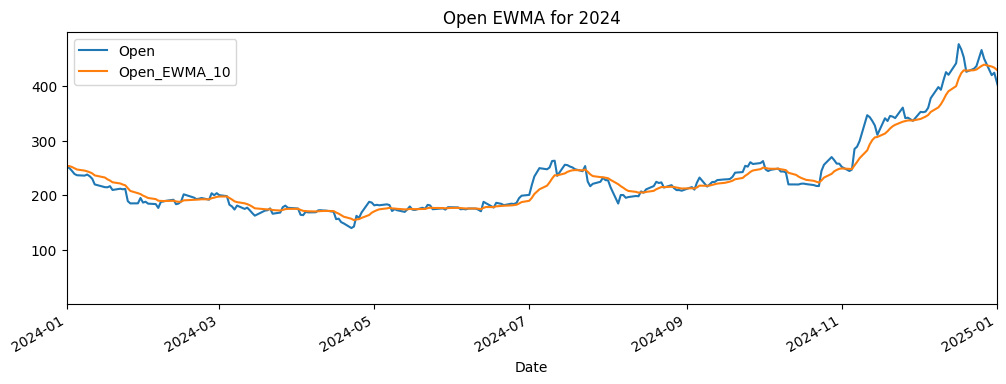

In [ ]:
df['Open'].plot()
df['Open_EWMA_10'].plot()

plt.xlim(['2024-01-01', '2025-01-01'])
plt.title('Open EWMA for 2024')
plt.legend()

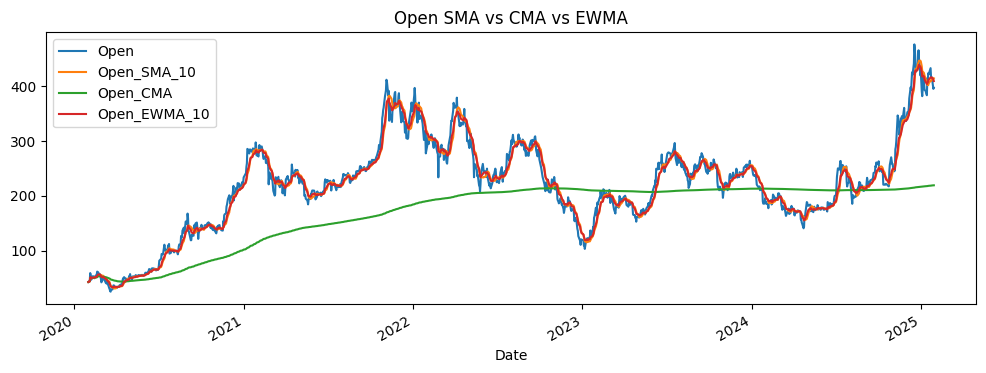

In [ ]:
df['Open'].plot()
df['Open_SMA_10'].plot()
df['Open_CMA'].plot()
df['Open_EWMA_10'].plot()

plt.title('Open SMA vs CMA vs EWMA')
plt.legend()